<a href="https://colab.research.google.com/github/hwangza125/-1/blob/data/%EC%84%9C%EC%9A%B8%EC%8B%9C_%EC%B9%B4%ED%8E%98%EC%9E%85%EC%A7%80_%EC%B6%94%EC%B2%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 프로젝트명: 서울시 상권분석 기반 카페 입지 추천

2. 프로젝트 개요 및 진행 배경
: SNS의 발전에 따라 특히 서울시에 예쁜 인테리어의 카페들이 많이 생겨나고 있으며, 그에 따라 새롭게 카페 창업을 할려는 사람들에게 추천해줄만한 카페 입지 확인

3. 데이터 수집 및 확인

In [4]:
from google.colab import files
uploaded = files.upload()

Saving 서울시 상권분석서비스(길단위인구-상권).csv to 서울시 상권분석서비스(길단위인구-상권).csv
Saving 서울시 상권분석서비스(상주인구-상권).csv to 서울시 상권분석서비스(상주인구-상권).csv
Saving 서울시 상권분석서비스(영역-상권).csv to 서울시 상권분석서비스(영역-상권).csv
Saving 서울시 상권분석서비스(점포-상권)_2024년.csv to 서울시 상권분석서비스(점포-상권)_2024년.csv
Saving 서울시 상권분석서비스(추정매출-상권)_2024년.csv to 서울시 상권분석서비스(추정매출-상권)_2024년.csv


In [5]:
import pandas as pd

# 예시: 추정매출-상권.csv 파일 불러오기
df = pd.read_csv("서울시 상권분석서비스(추정매출-상권)_2024년.csv", encoding='cp949')
df1 = pd.read_csv("서울시 상권분석서비스(영역-상권).csv", encoding='cp949')
df2 = pd.read_csv("서울시 상권분석서비스(점포-상권)_2024년.csv", encoding='cp949')
df3 = pd.read_csv("서울시 상권분석서비스(상주인구-상권).csv", encoding='cp949')
df4 = pd.read_csv("서울시 상권분석서비스(길단위인구-상권).csv", encoding='cp949')
df.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20241,A,골목상권,3110001,이북5도청사,CS100001,한식음식점,385150643,11743,220129223,...,3496,52,6023,4281,26,508,935,1997,3135,3704
1,20241,A,골목상권,3110001,이북5도청사,CS100009,호프-간이주점,11026440,214,6576206,...,123,39,103,78,0,0,0,32,55,95
2,20241,A,골목상권,3110001,이북5도청사,CS200001,일반교습학원,52047765,224,50535211,...,112,8,48,176,0,0,8,152,64,0
3,20241,A,골목상권,3110002,독립문역 1번,CS100001,한식음식점,582522265,20630,404509479,...,5358,487,11887,7589,17,914,2595,3483,5408,7049
4,20241,A,골목상권,3110002,독립문역 1번,CS100005,제과점,446525280,40242,350264783,...,11472,2634,16005,22755,329,3589,7446,8867,9543,8986


- 서울시 상권 추정매출 데이터셋은 약 87000건의 데이터 보유

- 기준년도와 분기, 상권코드, 서비스업종코드명, 당월매출금액, 연령대별 매출건수, 시간대별 매출건수 등 55개의 컬럼 존재

- 본격적인 데이터 분석하기 전 모든 컬럼명, 기초통계값, 결측치 확인

In [6]:
# 컬럼명 확인
print("컬럼 목록:")
print(df.columns.tolist())

# 데이터 간단 요약
print("\n기초 통계:")
print(df.describe(include='all'))

# 결측치 확인
print("\n결측치 개수:")
print(df.isnull().sum())

컬럼 목록:
['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

기초 통계:
           기준_년분기_코드 상권_구분_코드 상권_구분_코드_명         상권_코드  \
count   87179.000000    87179      87179  8.717900e+04   
unique           NaN        4          4           Na

- 길단위인구, 상주인구, 영역, 점포, 추정매출의 중복되는 컬럼명을 찾기 위해 각 데이터셋별 컬럼 목록 확인

In [7]:
# 컬럼명 확인
print("컬럼 목록:")
print(df.columns.tolist())
print("컬럼 목록:")
print(df1.columns.tolist())
print("컬럼 목록:")
print(df2.columns.tolist())
print("컬럼 목록:")
print(df3.columns.tolist())
print("컬럼 목록:")
print(df4.columns.tolist())

컬럼 목록:
['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']
컬럼 목록:
['상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '엑스좌표_값', '와이좌표_값', '자치구_코드', '자치구_코드_명', '행정동_코드', '행정동_코드_명', '영역_면적']
컬럼 목록:
['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권

4. '커피-음료' 선정 계기
 - 개업 점포 수와 폐업 점포 수를 통해 2024년 많이 개폐업된 서비스 업종 정렬
 - 정렬된 서비스 업종 중 '커피-음료'를 자주 애용함

In [8]:
#서비스 업종별 개업 점포 수와 폐업 점포 수
df2_all=df2.groupby('서비스_업종_코드_명')[['개업_점포_수', '폐업_점포_수']].sum().reset_index()
print(df2_all)
sort_df2=df2_all.sort_values(by='개업_점포_수', ascending=False).head(10)
print(sort_df2)

   서비스_업종_코드_명  개업_점포_수  폐업_점포_수
0         DVD방       23        3
1          PC방      310      259
2           가구       88      194
3           가방      136      249
4         가전제품       53      108
..         ...      ...      ...
95         핸드폰      183      615
96     호프-간이주점     1576     2774
97         화장품      223     1232
98          화초      424      340
99      회계사사무소        6       21

[100 rows x 3 columns]
   서비스_업종_코드_명  개업_점포_수  폐업_점포_수
93       한식음식점     9290     7548
84       커피-음료     3899     4153
62      일반교습학원     2818     1404
63        일반의류     2253     5677
32       분식전문점     1781     1735
91       피부관리실     1759      673
96     호프-간이주점     1576     2774
40        슈퍼마켓     1377      964
65       일식음식점     1356     1131
23         미용실     1297     1119


In [9]:
#'커피-음료'의 분기별 개폐업 점포 수
df2_cafe = df2[df2['서비스_업종_코드_명'] == '커피-음료']
quarter_oc=df2_cafe.groupby('기준_년분기_코드')[['개업_점포_수', '폐업_점포_수']].sum().reset_index()
quarter_oc

,기준_년분기_코드,개업_점포_수,폐업_점포_수
0,20241,1210,1054
1,20242,987,1028
2,20243,934,1111
3,20244,768,960


5. 데이터 전처리
 - 카페에 해당하는 '서비스_업종_코드_명'은 '커피-음료'
 - 분석 목적을 고려해서 먼저, '서비스_업종_코드_명'을 '커피-음료'로 데이터 범위를 제한
 - 불필요한 서비스 업종 제외

In [10]:
# '커피-음료' 업종의 매출 데이터 필터링
df_cafe = df[df['서비스_업종_코드_명'] == '커피-음료']
# Top5 확인(총 4348행)
df_cafe.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
6,20241,A,골목상권,3110002,독립문역 1번,CS100010,커피-음료,56568383,6508,43044857,...,1575,0,2183,3904,59,508,994,1108,2123,1293
14,20241,A,골목상권,3110003,세검정초등학교,CS100010,커피-음료,25563951,3528,15604600,...,536,36,1761,1732,49,395,546,734,1064,705
25,20241,A,골목상권,3110005,세검정,CS100010,커피-음료,19060169,959,10067348,...,88,0,496,462,0,32,130,381,121,294
29,20241,A,골목상권,3110006,부암동주민센터,CS100010,커피-음료,51426053,4038,25456595,...,1276,403,1670,2293,5,1035,1254,674,650,345
31,20241,A,골목상권,3110007,사직공원(한국사회과학도서관),CS100010,커피-음료,2243575,282,1089672,...,28,0,124,158,0,56,113,51,45,17


- 카페 입지를 선정하기 위해 고려할 요소 -> 총매출액, 점포 수

- 분석 목적을 고려해서 최신 분기를 기준으로 총매출액 계산

- 추정매출의 데이터 중, 최신 분기만을 추출하여 사용함. 각 분기에 개업 및 폐업하는 매장이 1000개내외, 각 분기별 폐업 점포 수가 개업 점포 수보다 높음. 트랜드에 따라 상권을 빠르게 변화하기 때문에 최신 분기의 데이터를 추출해 분석하는 것이 트랜드를 가장 잘 반영하는 중요한 요소라고 판단

In [23]:
# 상권별 총 매출액 집계
# 최신 분기 확인
branch4 = df_cafe['기준_년분기_코드'].max()

# 최신 분기 + 커피-음료 업종의 상권별 총 매출액
df_cafe_4 = df_cafe[df_cafe['기준_년분기_코드'] == branch4]
cafe_sales_area = df_cafe_4.groupby('상권_코드_명')['당월_매출_금액'].sum().reset_index()

# 매출액 기준 상위 10개 상권
top_areas = cafe_sales_area.sort_values(by='당월_매출_금액', ascending=False).head(10)
top_areas

,상권_코드_명,당월_매출_금액
354,명동 남대문 북창동 다동 무교동 관광특구,23871299233
33,강남역,13597383785
769,여의도역(여의도),13548894206
17,가산디지털단지,12296188308
770,역삼역,11659901672
1054,홍대입구역(홍대),11366065728
892,잠실 관광특구,10912180197
659,시청역_8번,10343530899
355,명동(명동거리),10227354816
67,건대입구역(건대),8874302221


In [24]:
# 점포 수 데이터에서 커피-음료 점포 수 추출
df2_cafe = df2[df2['서비스_업종_코드_명'] == '커피-음료']
df2_cafe_4 = df2_cafe[df2_cafe['기준_년분기_코드'] == branch4]

# 상권별 점포 수
store_count = df2_cafe_4.groupby('상권_코드_명')['점포_수'].sum().reset_index()
store_count.sort_values(by='점포_수', ascending=False).head(10)

,상권_코드_명,점포_수
1479,홍대입구역(홍대),236
503,명동 남대문 북창동 다동 무교동 관광특구,236
1071,연남동(홍대),203
25,가산디지털단지,178
1062,여의도역(여의도),132
48,강남역,129
1063,역삼역,128
1307,종로3가역,122
542,문정역,118
1312,종로·청계 관광특구,115


In [13]:
# 유동 인구와 상주 인구 결합은 추후 병합 가능
# df3(상주인구), df4(길단위인구)도 상권_코드, 기준_년분기_코드로 병합 가능
df_people = pd.merge(df3, df4, on=['상권_코드', '기준_년분기_코드'], suffixes=('_유동', '_상주'))

- 분석에 필요한 데이터 수집 및 전처리 완료 후 매출 대비 경쟁도를 비교해서 입지 추천

- 목표는 "매출 대비 경쟁 점포 수" 분석으로 유망 입지를 찾는 것

- 상권별 총매출과 점포수

|상권명|총 매출|점포 수|
|--|--|--|
|명동 관광특구|238억|236|
|강남역|135억|129|
|여의도역|135억|132|
|홍대입구역|113억|236|
|가산디지털단지|122억|178|


- '홍대'는 매출은 높은데 점포 수도 매우 많아서 경쟁이 치열함. 반면 비슷한 매출 대비 점포 수가 적은 곳이 더 유망할 수 있을 것으로 판단됨

In [14]:
# 매출 대비 점포 수는 점포당 매출 계산와 같음
# 매출 데이터와 점포 수 데이터를 상권 이름 기준으로 병합
merged = pd.merge(top_areas, store_count, on='상권_코드_명')

# 점포당 매출 계산
merged['점포당_매출'] = merged['당월_매출_금액'] / merged['점포_수']

# 정렬 후 Top10 출력
merged_sorted = merged.sort_values(by='점포당_매출', ascending=False)
merged_sorted[['상권_코드_명', '당월_매출_금액', '점포_수', '점포당_매출']]

,상권_코드_명,당월_매출_금액,점포_수,점포당_매출
7,시청역_8번,10343530899,27,3.830937e+08
8,명동(명동거리),10227354816,67,1.526471e+08
1,강남역,13597383785,129,1.054061e+08
2,여의도역(여의도),13548894206,132,1.026431e+08
0,명동 남대문 북창동 다동 무교동 관광특구,23871299233,236,1.011496e+08
9,건대입구역(건대),8874302221,89,9.971126e+07
6,잠실 관광특구,10912180197,113,9.656797e+07
4,역삼역,11659901672,128,9.109298e+07
3,가산디지털단지,12296188308,178,6.907971e+07
5,홍대입구역(홍대),11366065728,236,4.816130e+07


In [15]:
merged_sorted['당월_매출_금액(억)'] = (merged_sorted['당월_매출_금액'] / 1e8).round(2)
merged_sorted['점포당_매출(억)'] = (merged_sorted['점포당_매출'] / 1e8).round(2)
merged_sorted[['상권_코드_명', '당월_매출_금액(억)', '점포_수', '점포당_매출(억)']]

,상권_코드_명,당월_매출_금액(억),점포_수,점포당_매출(억)
7,시청역_8번,103.44,27,3.83
8,명동(명동거리),102.27,67,1.53
1,강남역,135.97,129,1.05
2,여의도역(여의도),135.49,132,1.03
0,명동 남대문 북창동 다동 무교동 관광특구,238.71,236,1.01
9,건대입구역(건대),88.74,89,1.00
6,잠실 관광특구,109.12,113,0.97
4,역삼역,116.60,128,0.91
3,가산디지털단지,122.96,178,0.69
5,홍대입구역(홍대),113.66,236,0.48


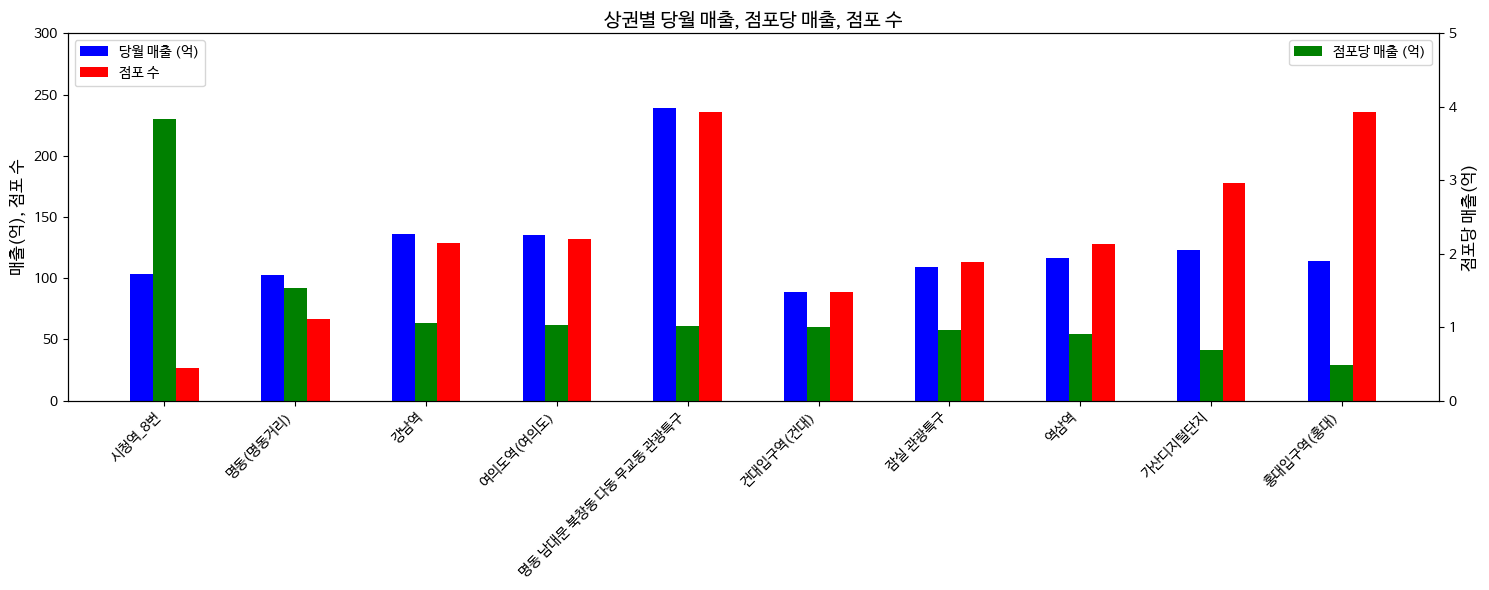

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 단위 변환
merged_sorted['당월_매출_억'] = merged_sorted['당월_매출_금액'] / 1e8
merged_sorted['점포당_매출_억'] = merged_sorted['점포당_매출'] / 1e8

labels = merged_sorted['상권_코드_명']
x = np.arange(len(labels))
width = 0.35

fig, ax1 = plt.subplots(figsize=(15, 6))

# 왼쪽 축: 매출, 점포당 매출
bar1 = ax1.bar(x - width/2, merged_sorted['당월_매출_억'], width/2, label='당월 매출 (억)', color='blue')
bar2 = ax1.bar(x + width/2, merged_sorted['점포_수'], width/2, label='점포 수', color='red')
ax1.set_ylim(0, 300)
ax1.set_ylabel('매출(억), 점포 수', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, ha='right')
ax1.legend(loc='upper left')

# 오른쪽 축: 점포 수
ax2 = ax1.twinx()
bar3 = ax2.bar(x, merged_sorted['점포당_매출_억'], width/2, label='점포당 매출 (억)', color='green')
ax2.set_ylim(0, 5)
ax2.set_ylabel('점포당 매출(억)', fontsize=12)
ax2.legend(loc='upper right')

plt.title('상권별 당월 매출, 점포당 매출, 점포 수', fontsize=14)
plt.tight_layout()
plt.show()

- 점포당 매출이 높고, 점포 수가 적당하거나 적은 지역이 고수익 유망 입지
- 점포당 매출은 경쟁이 덜하면서도 시장 규모는 충분한 지역을 선별하는 핵심 지표

6. 분석 요약
- 앞의 결과 데이터 기반으로 입지 유망도를 평가 가능
- 분석을 통해 '점포당 매출 Top 3 상권' 도출
- 즉, 매출 대비 경쟁이 적은 고수익 상권 Top 3

|순위|상권명|총 매출(원)|점포 수|점포당 매출|
|--|--|--|--|--|
|1|시청역_8번 출구|103억|27|3.83억|
|2|명동(명동거리)|102억|67|1.52억|
|3|강남역|135억|129|1.05억|


7. 인사이트
  - **시청역 8번 출구**는 적은 점포 수 대비 매우 높은 점포당 매출 → 숨은 황금 입지 가능성 높음
  - **명동 거리/강남역**은 상권 규모도 크면서 점포당 매출도 우수 → 브랜드 경쟁력이 있으면 도전 가치 있음
  - **홍대입구**는 매출 자체는 높지만 경쟁이 매우 치열함 (점포당 매출이 절반 수준)

8. 시각화
  - 상위 3개 지역의 인구 통계 데이터 병합 후 지도에 표시

- 단순히 총매출과 점포수, 점포당 매출로는 좋은 입지라고 단정짓기엔 근거가 부족함. 진짜 돈이 될 가능성 높은 상권인지 판단하기 위해서 길단위/상주인구 데이터를 추가로 활용해 유동인구가 실질적으로 많은지 추가 검증

In [ ]:
# 인구 데이터(df3: 상주인구, df4: 유동인구) 불러오기
df3 = pd.read_csv("서울시 상권분석서비스(상주인구-상권).csv", encoding='cp949')
df4 = pd.read_csv("서울시 상권분석서비스(길단위인구-상권).csv", encoding='cp949')

In [ ]:
# Top3 지역만 필터링
# 분석 대상 상권 리스트
top3_areas = ['시청역_8번', '명동(명동거리)', '강남역']
# 상주인구 데이터에서 추출
df3_filtered = df3[df3['상권_코드_명'].isin(top3_areas)].copy()
# 유동인구 데이터에서 추출
df4_filtered = df4[df4['상권_코드_명'].isin(top3_areas)].copy()

In [ ]:
# 컬럼 정리
# 상주인구 주요 항목 확인
print("상주인구 데이터 컬럼:", df3_filtered.columns.tolist())
# 유동인구 주요 항목 확인
print("유동인구 데이터 컬럼:", df4_filtered.columns.tolist())

상주인구 데이터 컬럼: ['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '총_상주인구_수', '남성_상주인구_수', '여성_상주인구_수', '연령대_10_상주인구_수', '연령대_20_상주인구_수', '연령대_30_상주인구_수', '연령대_40_상주인구_수', '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수', '남성연령대_10_상주인구_수', '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수', '남성연령대_40_상주인구_수', '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수', '여성연령대_10_상주인구_수', '여성연령대_20_상주인구_수', '여성연령대_30_상주인구_수', '여성연령대_40_상주인구_수', '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수', '총_가구_수', '아파트_가구_수', '비_아파트_가구_수']
유동인구 데이터 컬럼: ['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수', '시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수', '월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수']


In [ ]:
# 상주인구 + 유동인구 데이터 결합
# 데이터 병합 (상권_코드_명 기준)
population_merged = pd.merge(df3_filtered, df4_filtered, on='상권_코드_명', suffixes=('_상주', '_유동'))
# 병합 결과 확인
population_merged.head()

,기준_년분기_코드_상주,상권_구분_코드_상주,상권_구분_코드_명_상주,상권_코드_상주,상권_코드_명,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,20241,D,발달상권,3120189,강남역,6248,2953,3295,562,1240,...,1495658,1750807,770488,1180189,1220271,1183810,1240055,1308756,994724,739120
1,20241,D,발달상권,3120189,강남역,6248,2953,3295,562,1240,...,1453034,1689503,755276,1186275,1188488,1152196,1192098,1258795,966672,726946
2,20241,D,발달상권,3120189,강남역,6248,2953,3295,562,1240,...,1507140,1718453,753217,1203251,1215497,1225947,1242179,1290821,964190,723329
3,20241,D,발달상권,3120189,강남역,6248,2953,3295,562,1240,...,1475381,1695902,752955,1186980,1265150,1162488,1225062,1286791,945884,713430
4,20241,D,발달상권,3120189,강남역,6248,2953,3295,562,1240,...,1492824,1743607,771420,1163412,1240055,1297443,1243769,1235968,958679,734784


- 병합된 population_merged는 Top3 상권(강남역, 명동, 시청역_8번)의 상주인구 + 유동인구가 함께 있는 통합 테이블
- 여기서 행의 중복으로 같은 상권 이름에 대해 여러 레코드가 존재(시간대 or 분기 단위)함을 알 수 있음. 평균을 기준으로 집계하여 행의 중복 제거

In [ ]:
# result_df(매출 데이터)와 population_merged(인구 데이터) 결합
# 인구 데이터를 상권당 1행으로 집계 (평균)
# 상권별로 평균값 집계
population_summary = population_merged.groupby('상권_코드_명').mean(numeric_only=True).reset_index()

In [ ]:
# 매출 데이터(merged_sorted)에서 Top3 추출
# Top3 상권 리스트
top3_areas = ['시청역_8번', '명동(명동거리)', '강남역']

# merged_sorted에서 Top3 필터링
top3_sales = merged_sorted[merged_sorted['상권_코드_명'].isin(top3_areas)]

In [ ]:
# 최종 병합
# 인구 + 매출 데이터 병합
final_df = pd.merge(top3_sales, population_summary, on='상권_코드_명', how='left')

# 결과 확인
final_df.head()

,상권_코드_명,당월_매출_금액,점포_수,점포당_매출,기준_년분기_코드_상주,상권_코드_상주,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,시청역_8번,10343530899,27,3.830937e+08,20222.5,3120021.0,20.909091,13.636364,7.272727,0.181818,...,112411.48,81883.44,21176.08,81606.32,86735.72,84716.44,86165.96,82509.08,29960.40,22216.36
1,명동(명동거리),10227354816,67,1.526471e+08,20222.5,3120028.0,113.272727,72.545455,40.727273,5.090909,...,389938.24,343152.08,99201.76,258378.32,269954.08,270617.76,271486.92,270812.80,176855.32,159473.48
2,강남역,13597383785,129,1.054061e+08,20222.5,3120189.0,6220.181818,2925.545455,3294.636364,601.636364,...,1457530.44,1713362.88,754956.44,1158756.08,1207866.64,1200942.64,1211907.04,1237678.16,955830.44,729923.44


- final_df의 컬럼은 50개가 넘기에 지도 시각화에 바로 쓰기엔 너무 복잡하다고 판단하여 간단히 요약 및 컬럼명을 정리 후 Folium 시각화
- Folium은 좌표 기반으로 간단한 정보만 시각화에 적합함. 지도 위에 보여줄 수 있는 건 일반적으로 상권 이름, 매출, 인구 수치 등 1~3개 정보임

In [ ]:
#Folium 시각화를 위한 final_df 요약 및 컬럼명 변경
# final_df에서 필요한 컬럼만 추출
map_df = final_df[[
    '상권_코드_명',
    '당월_매출_금액',
    '점포_수',
    '점포당_매출',
    '총_상주인구_수',
    '남성_상주인구_수',
    '여성_상주인구_수',
    '총_유동인구_수'
]].copy()

In [ ]:
# 유동인구 총합 컬럼 생성
# 유동인구 관련 컬럼만 추출 후 총합 계산
floating_cols = [col for col in final_df.columns if '유동인구_수' in col and '총_' not in col]
map_df['총_유동인구_수'] = final_df[floating_cols].sum(axis=1)

In [ ]:
# 컬럼명 재정의
map_df = map_df.rename(columns={
    '상권_코드_명': '상권명',
    '당월_매출_금액': '총매출',
    '점포_수': '점포수',
    '점포당_매출': '점포당매출',
    '총_상주인구_수': '상주인구',
    '남성_상주인구_수': '남성',
    '여성_상주인구_수': '여성',
    '총_유동인구_수': '유동인구'
})
map_df.head()

,상권명,총매출,점포수,점포당매출,상주인구,남성,여성,유동인구
0,시청역_8번,10343530899,27,3.830937e+08,20.909091,13.636364,7.272727,1895640.60
1,명동(명동거리),10227354816,67,1.526471e+08,113.272727,72.545455,40.727273,6710316.64
2,강남역,13597383785,129,1.054061e+08,6220.181818,2925.545455,3294.636364,30811618.88


In [ ]:
# Folium 시각화
# df1(영역)에서 좌표 추출
coords = df1[['상권_코드_명', '엑스좌표_값', '와이좌표_값']].drop_duplicates()
coords.head()

,상권_코드_명,엑스좌표_값,와이좌표_값
0,배화여자대학교(박노수미술관),197093,453418
1,자하문터널,196991,455057
2,평창동서측,197064,456643
3,정독도서관,198581,453781
4,중앙고등학교,198883,453690


In [ ]:
# 좌표 병합
map_df = pd.merge(map_df, coords, left_on='상권명', right_on='상권_코드_명', how='left')

In [ ]:
# 좌표계 변환 (EPSG:5181 → WGS84)
from pyproj import Transformer

transformer = Transformer.from_crs("epsg:5181", "epsg:4326", always_xy=True)
map_df['longitude'], map_df['latitude'] = transformer.transform(
    map_df['엑스좌표_값'].values,
    map_df['와이좌표_값'].values
)

In [ ]:
# Folium 지도 시각화
import folium

# 서울 중심 지도 생성
m = folium.Map(location=[37.55, 126.98], zoom_start=12)

# 마커 추가로 위치 파악 용이
for _, row in map_df.iterrows():
    popup = f"{row['상권명']}<br>" \
            f"매출: {row['총매출']:,}원<br>" \
            f"점포수: {row['점포수']}개<br>" \
            f"유동인구: {int(row['유동인구']):,}명"

    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=popup
    ).add_to(m)

m

- 전체적인 지도의 디자인이 마커의 인지성을 저하시킨다고 판단
- 지도를 심플한 디자인으로 변경 후 각 마커별 매출을 기준으로 채도에 변화를 줌. 컬러바를 통해 마커의 색의 의미와 수치 정의

In [ ]:
import folium
import branca.colormap as bcm

# 점포당매출 기준 범위 설정
min_val = map_df['점포당매출'].min()
max_val = map_df['점포당매출'].max()

# 컬러맵 생성 (YlOrRd 스케일)
colormap = bcm.LinearColormap(
    colors=['#ffffb2', '#fecc5c', '#fd8d3c', '#f03b20', '#bd0026'],
    vmin=min_val,
    vmax=max_val,
    caption='점포당 매출 수준'
)

# 지도 생성
m = folium.Map(location=[37.55, 126.98], zoom_start=12, tiles='CartoDB positron')

# 마커 추가
for _, row in map_df.iterrows():
    color = colormap(row['점포당매출'])

    popup = folium.Popup(
        f"<b>{row['상권명']}</b><br>"
        f"총매출: {row['총매출']:,}원<br>"
        f"점포수: {row['점포수']}개<br>"
        f"점포당 매출: {int(row['점포당매출']):,}원<br>"
        f"상주인구: {int(row['상주인구']):,}명<br>"
        f"유동인구: {int(row['유동인구']):,}명",
        max_width=300
    )

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        popup=popup,
        tooltip=row['상권명']
    ).add_to(m)

# 컬러바 추가
colormap.add_to(m)

m